In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

%pip install shap
%pip install catboost
import shap
import catboost
from catboost import CatBoostClassifier, Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


# SHAP on Vulnerability (NVD/SARD) Datasets

Size of Dataset (22154, 67)
Accuracy:84.715720 %



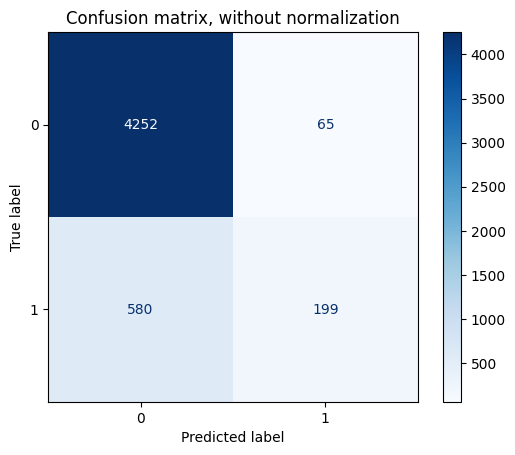

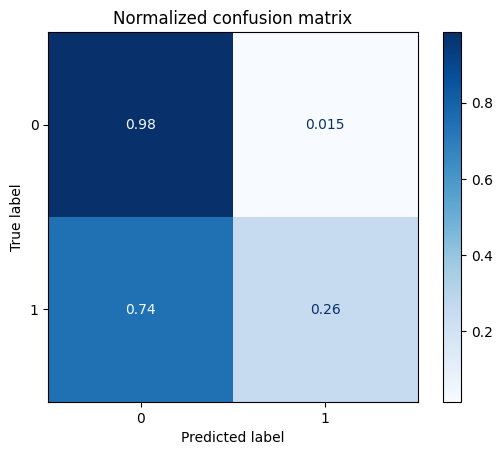

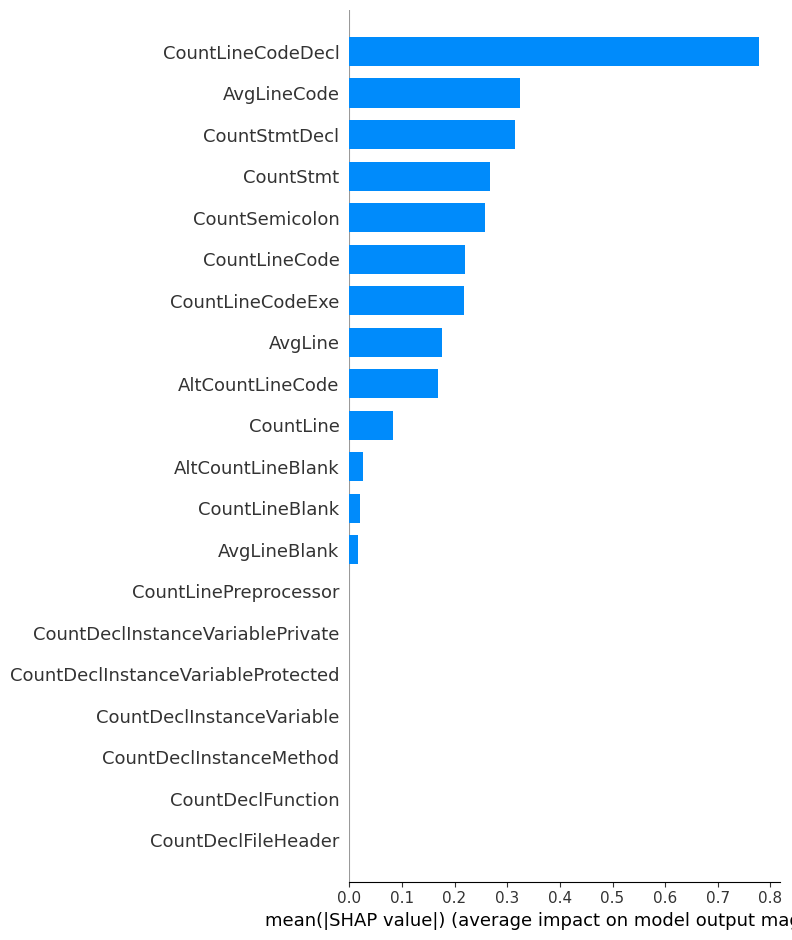

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


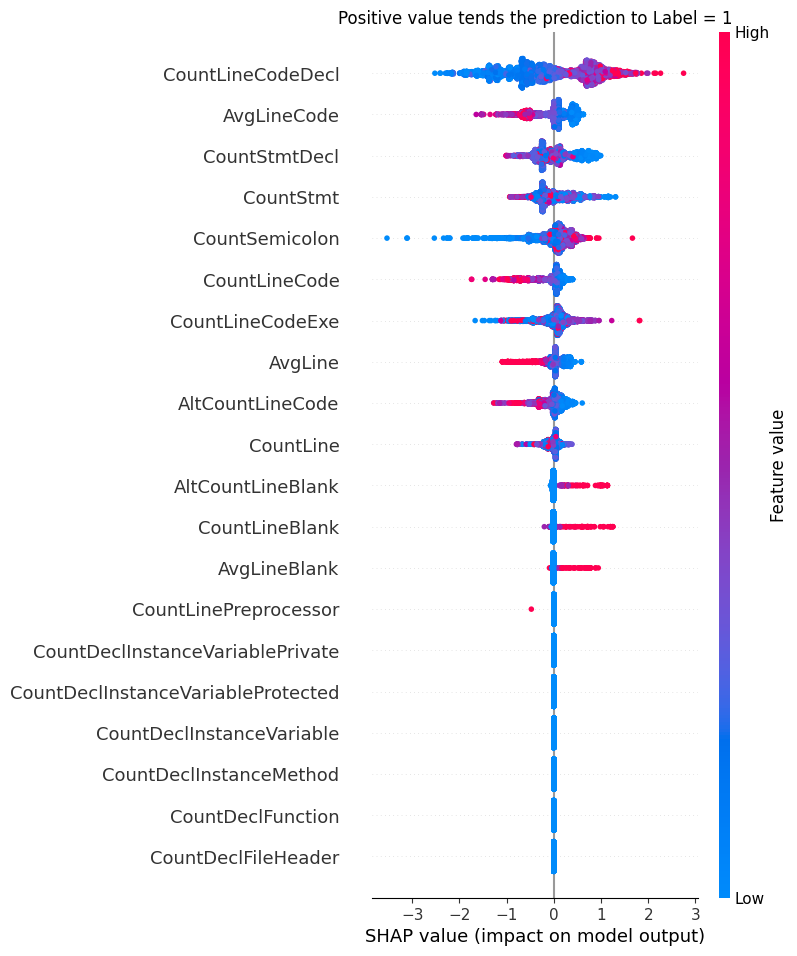

In [50]:
df = pd.read_csv('api_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':100, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot

shap.summary_plot(shap_values, X_test,show=False) #summary plot for Label=1 (HAS Vulnerability)
plt.title( "Positive value tends the prediction to Label = 1")
plt.show()


Size of Dataset (50608, 67)
Accuracy:73.480428 %



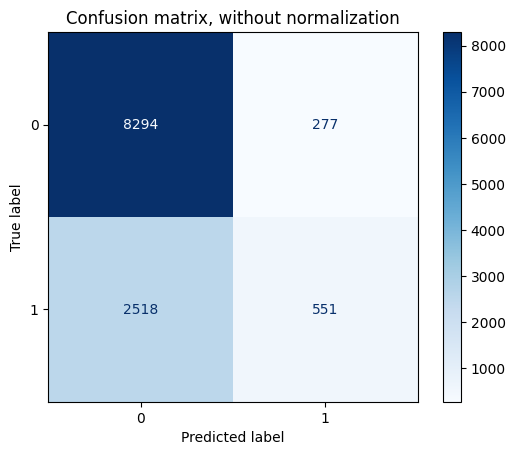

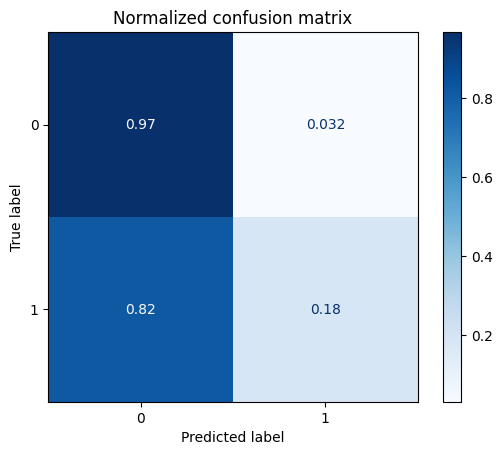

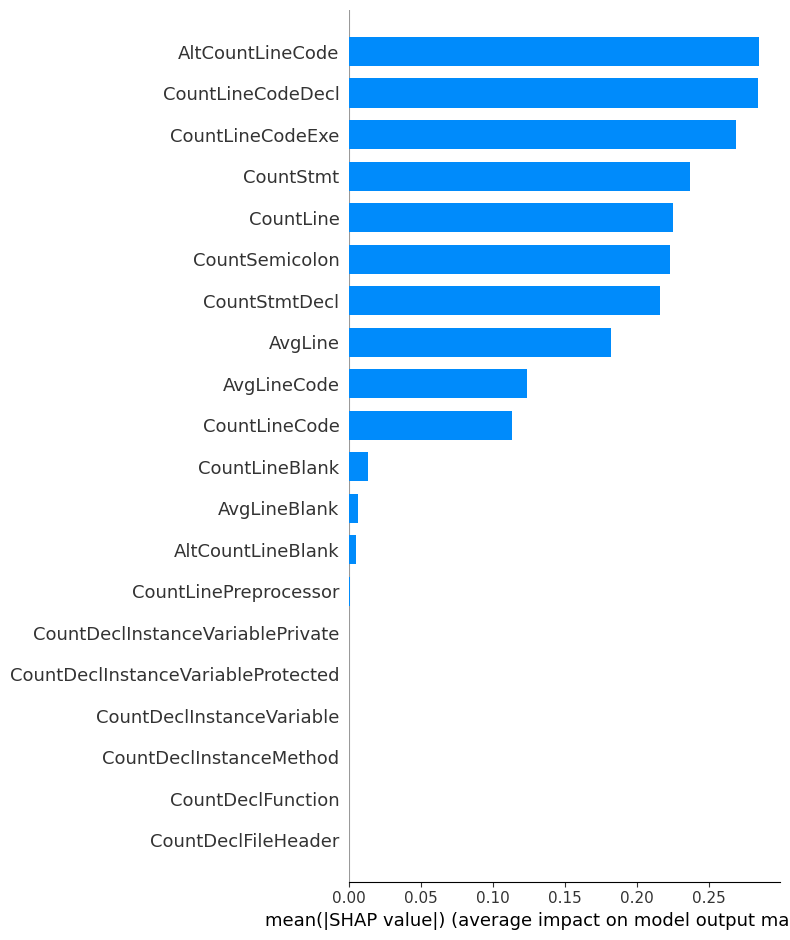

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


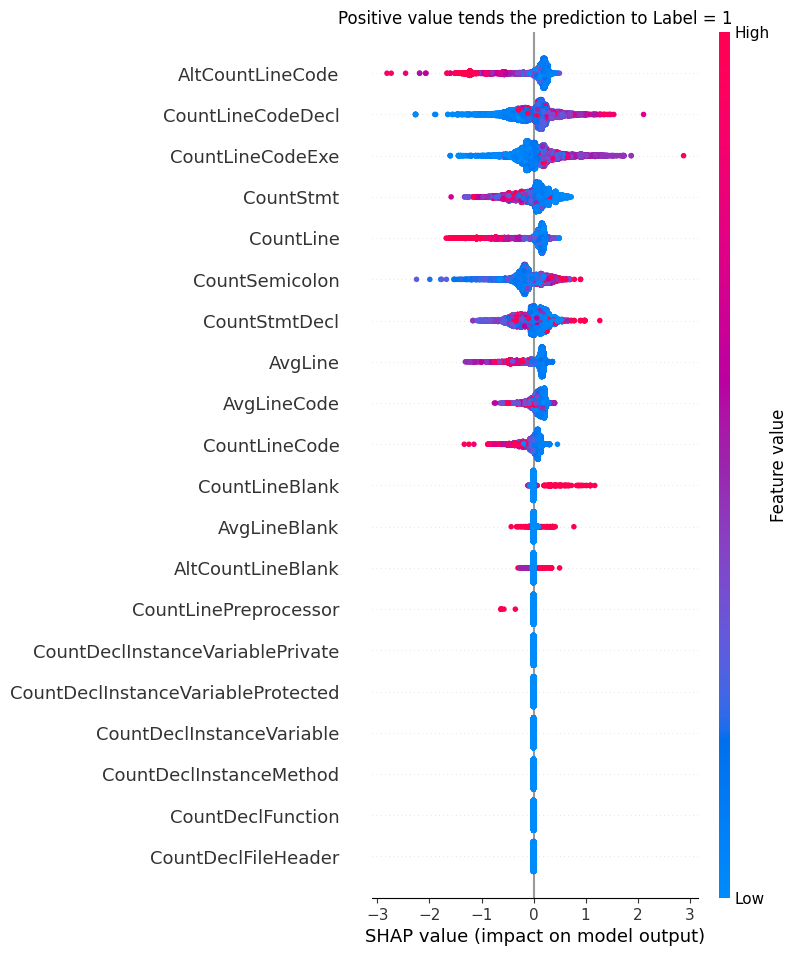

In [59]:
df = pd.read_csv('au_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot


shap.summary_plot(shap_values, X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 1")
plt.show()


Size of Dataset (265985, 67)
Accuracy:89.549787 %



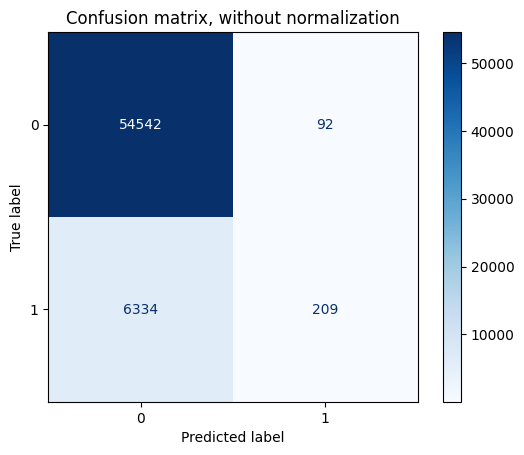

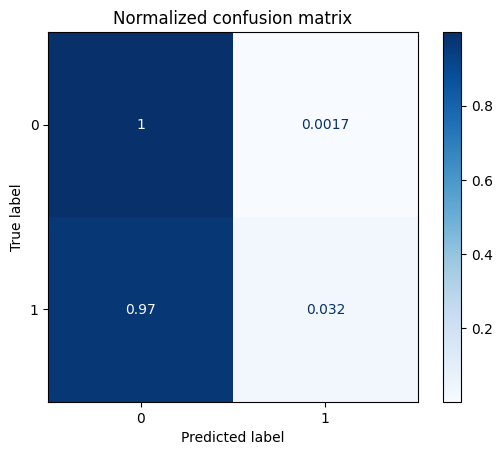

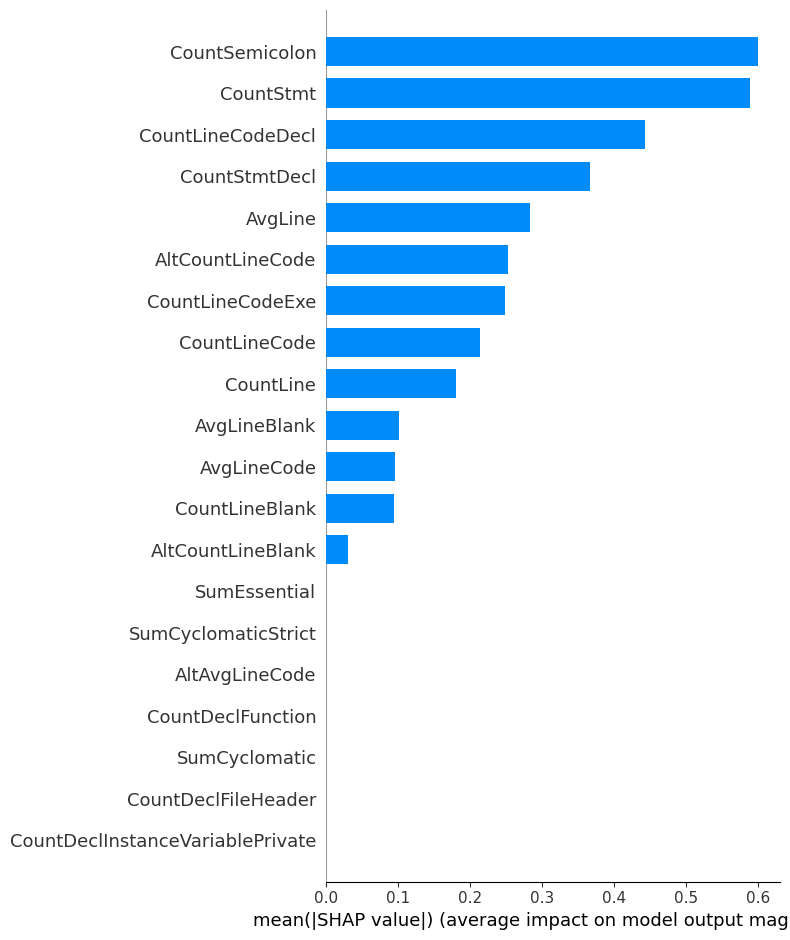

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


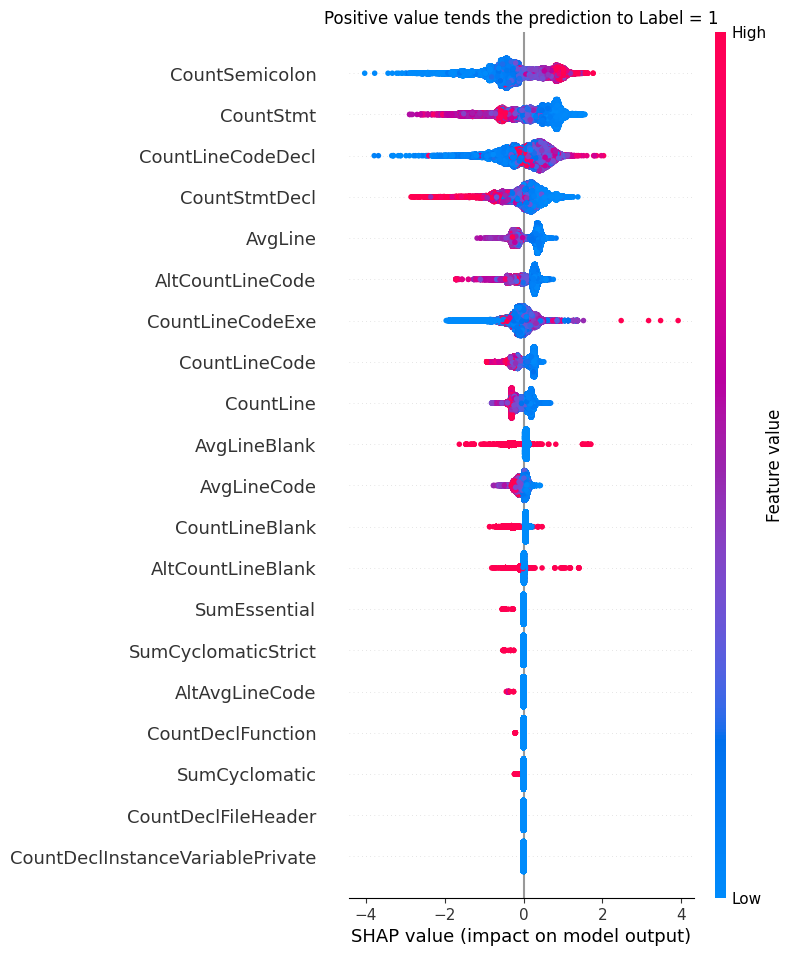

In [60]:
df = pd.read_csv('pu_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot


shap.summary_plot(shap_values, X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 1")
plt.show()


Size of Dataset (64403, 67)
Accuracy:78.834821 %



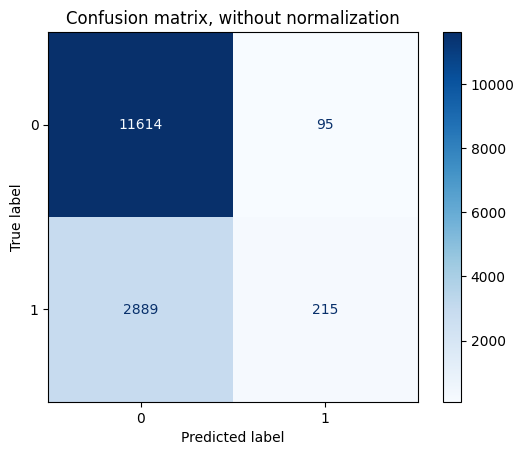

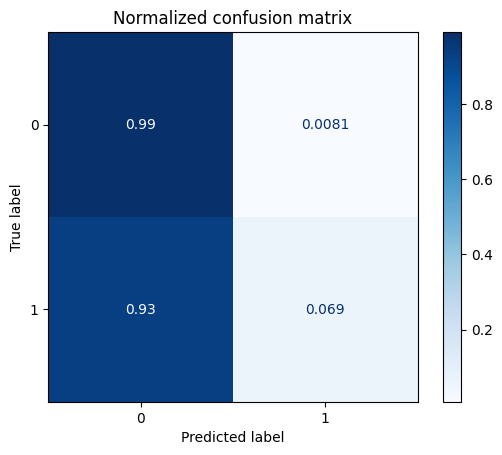

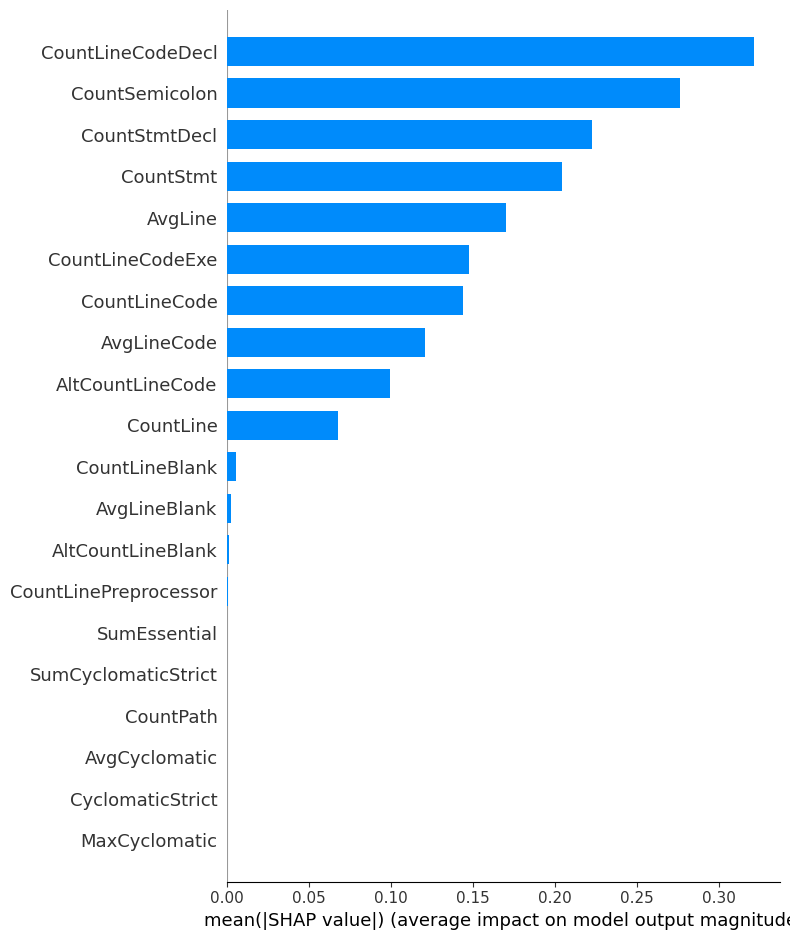

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


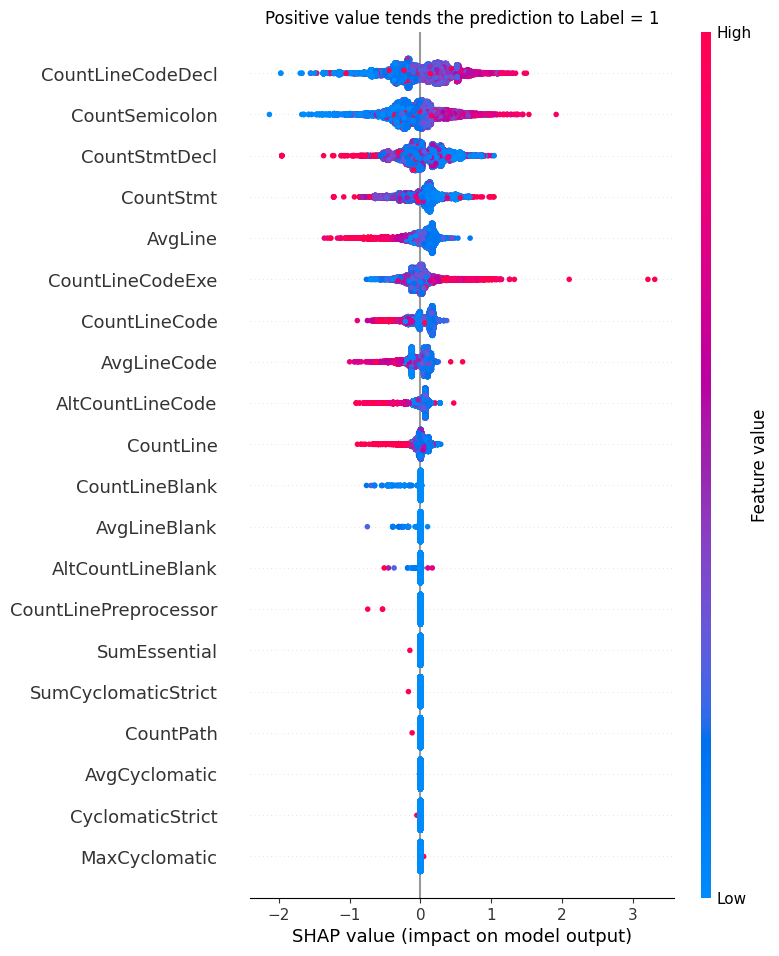

In [61]:
df = pd.read_csv('ae_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot


shap.summary_plot(shap_values, X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 1")
plt.show()


Size of Dataset (12411, 52)
Accuracy:98.235353 %



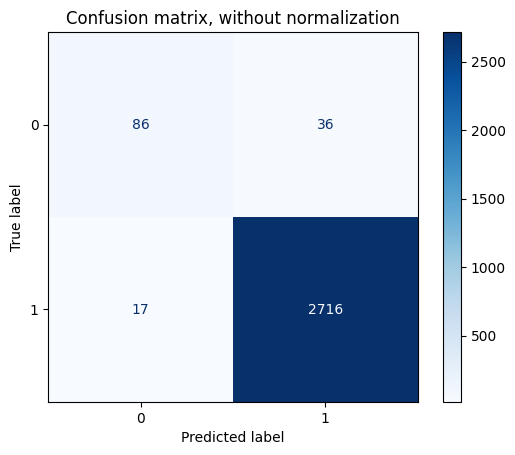

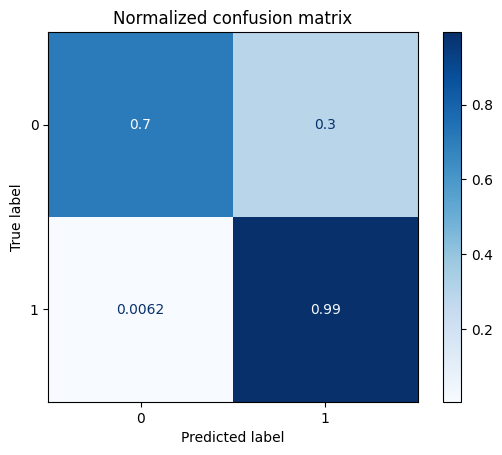

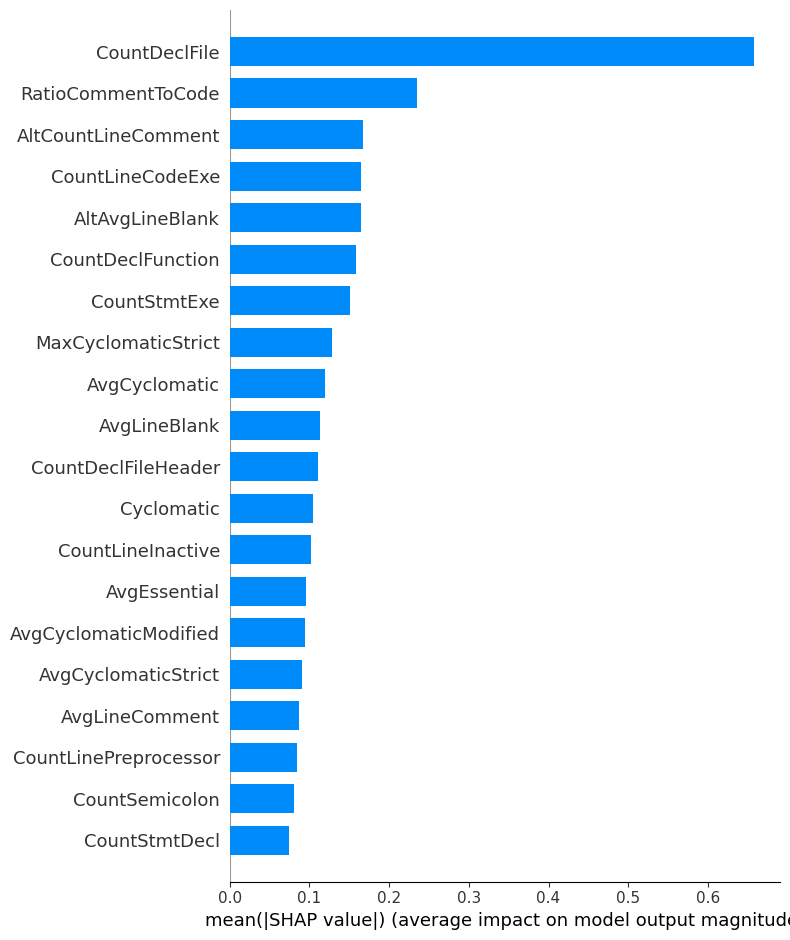

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


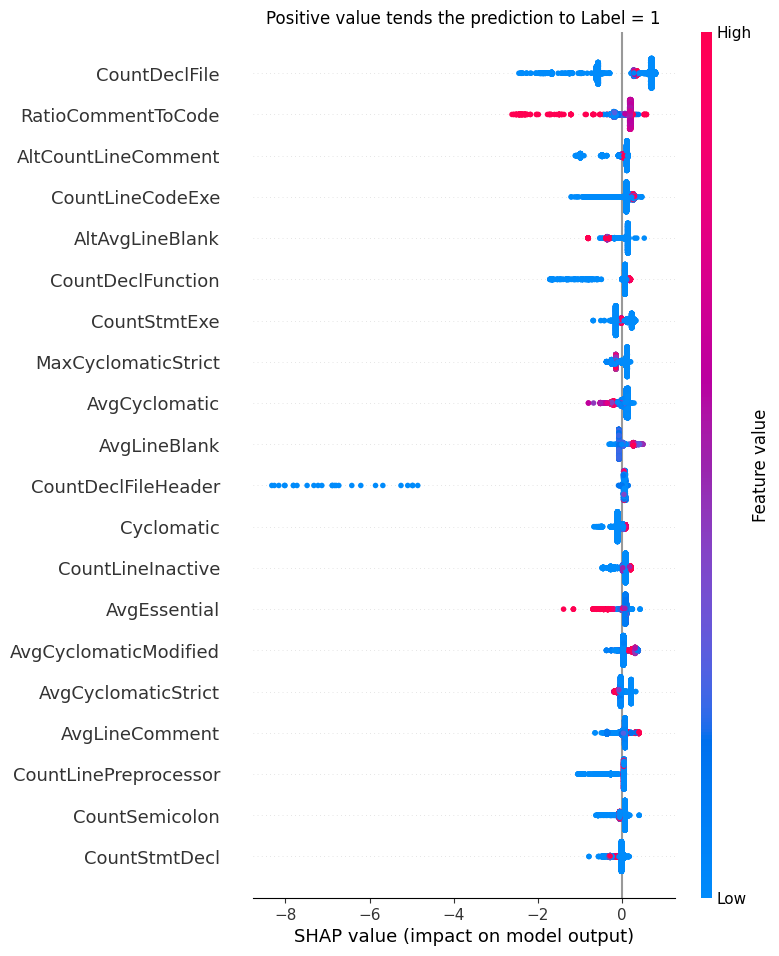

In [62]:
df = pd.read_csv('features_Total.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot


shap.summary_plot(shap_values, X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 1")
plt.show()


# Verification of SHAP

In [58]:
df = pd.read_csv('api_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=0) 
params = {'iterations':1500, 
            'learning_rate':0.09,
            'verbose':False
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

scores = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 5)
print("Original K-fold Validation Score:{:.6f}".format(scores.mean()))

y_pred = cat_model.predict(X_test)
print("Original Accuracy :{:.6f} %".format(accuracy_score(y_pred,y_test)*100))


df = df[['CountLineCodeDecl','AvgLineCode','CountStmtDecl','CountStmt','CountSemicolon',
         'CountLineCode','CountLineCodeExe','AvgLine','AltCountLineCode','CountLine','Label']]
features = [feat for feat in list(df)
              if feat != 'Label']

print()
print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=0) 

new_model = CatBoostClassifier(**params)
new_model.fit(X_train, y_train)


scores = cross_val_score(estimator = new_model, X = df[features], y = df[['Label']], cv = 5)
print("Changed K-fold Validation Score:{:.6f}".format(scores.mean()))

y_pred = new_model.predict(X_test)
print("Changed Accuracy :{:.6f} %".format(accuracy_score(y_pred,y_test)*100))



Size of Dataset (22154, 67)
Original K-fold Validation Score:0.854922
Original Accuracy :89.913658 %

Size of Dataset (22154, 11)
Changed K-fold Validation Score:0.857631
Changed Accuracy :90.247253 %
